In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_py_e = pd.read_csv('../partie1/results/python_euler.csv')
df_py_r = pd.read_csv('../partie1/results/python_rk4.csv')
df_cpp_e = pd.read_csv('../partie1/results/cpp_euler.csv')
df_cpp_r = pd.read_csv('../partie1/results/cpp_rk4.csv')

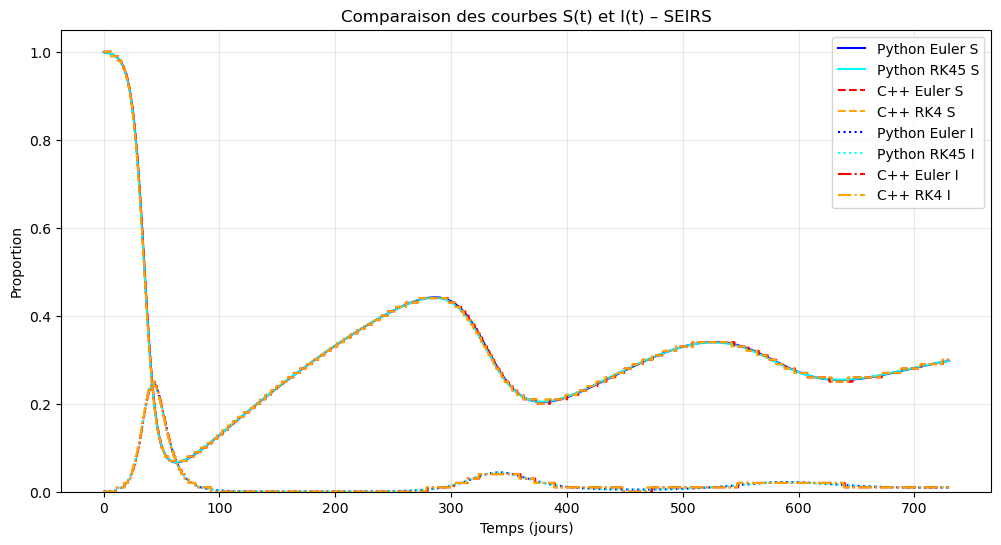

In [3]:
plt.figure(figsize=(12, 6))

plt.plot(df_py_e['time'], df_py_e['S'], label='Python Euler S', color='blue', linestyle='-')
plt.plot(df_py_r['time'], df_py_r['S'], label='Python RK45 S', color='cyan', linestyle='-')
plt.plot(df_cpp_e['time'], df_cpp_e['S'], label='C++ Euler S', color='red', linestyle='--')
plt.plot(df_cpp_r['time'], df_cpp_r['S'], label='C++ RK4 S', color='orange', linestyle='--')

plt.plot(df_py_e['time'], df_py_e['I'], label='Python Euler I', color='blue', linestyle=':')
plt.plot(df_py_r['time'], df_py_r['I'], label='Python RK45 I', color='cyan', linestyle=':')
plt.plot(df_cpp_e['time'], df_cpp_e['I'], label='C++ Euler I', color='red', linestyle='-.')
plt.plot(df_cpp_r['time'], df_cpp_r['I'], label='C++ RK4 I', color='orange', linestyle='-.')

plt.xlabel('Temps (jours)')
plt.ylabel('Proportion')
plt.title('Comparaison des courbes S(t) et I(t) – SEIRS')
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05)
plt.savefig('../figures/part1_comparisons.png', dpi=150, bbox_inches='tight')
plt.show()

In [4]:
# Différences maximales absolues (exemples)
print("Diff max S (Python Euler vs C++ Euler) :", np.max(np.abs(df_py_e['S'] - df_cpp_e['S'])))
print("Diff max I (Python RK45 vs C++ RK4)   :", np.max(np.abs(df_py_r['I'] - df_cpp_r['I'])))
print("\nConclusion rapide :")
print("→ Différences entre langages très faibles (floating point).")
print("→ RK45 (scipy) plus précis / stable que Euler simple.")

Diff max S (Python Euler vs C++ Euler) : 0.0050000000000000044
Diff max I (Python RK45 vs C++ RK4)   : 0.005

Conclusion rapide :
→ Différences entre langages très faibles (floating point).
→ RK45 (scipy) plus précis / stable que Euler simple.


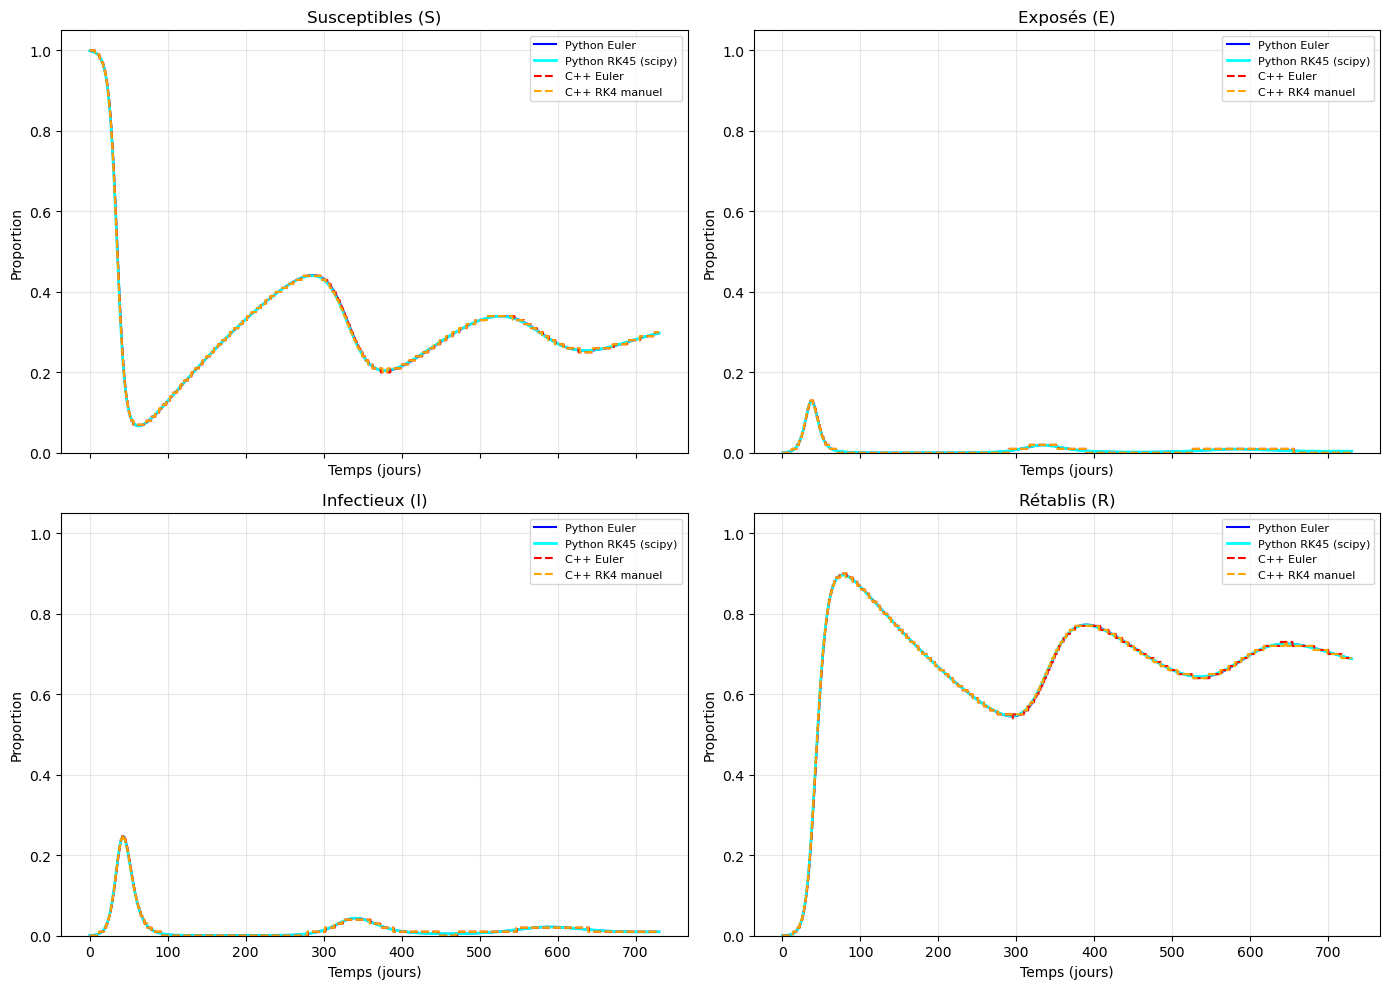

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Chargement (au cas où pas déjà fait)
df_py_e = pd.read_csv('../partie1/results/python_euler.csv')
df_py_r = pd.read_csv('../partie1/results/python_rk4.csv')
df_cpp_e = pd.read_csv('../partie1/results/cpp_euler.csv')
df_cpp_r = pd.read_csv('../partie1/results/cpp_rk4.csv')

fig, axs = plt.subplots(2, 2, figsize=(14, 10), sharex=True)

compartments = ['S', 'E', 'I', 'R']
titles = ['Susceptibles (S)', 'Exposés (E)', 'Infectieux (I)', 'Rétablis (R)']

for i, (comp, title) in enumerate(zip(compartments, titles)):
    ax = axs[i//2, i%2]
    ax.plot(df_py_e['time'], df_py_e[comp], label='Python Euler', color='blue')
    ax.plot(df_py_r['time'], df_py_r[comp], label='Python RK45 (scipy)', color='cyan', linewidth=2)
    ax.plot(df_cpp_e['time'], df_cpp_e[comp], label='C++ Euler', color='red', linestyle='--')
    ax.plot(df_cpp_r['time'], df_cpp_r[comp], label='C++ RK4 manuel', color='orange', linestyle='--')
    
    ax.set_title(title)
    ax.set_xlabel('Temps (jours)')
    ax.set_ylabel('Proportion')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=8)
    ax.set_ylim(0, 1.05)

plt.tight_layout()
plt.savefig('../figures/part1_all_compartments_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

In [2]:
# Différences maximales absolues entre méthodes / langages
print("=== Différences maximales absolues ===")
print(f"Python Euler vs Python RK45 (S) : {np.max(np.abs(df_py_e['S'] - df_py_r['S'])):.2e}")
print(f"Python Euler vs Python RK45 (I) : {np.max(np.abs(df_py_e['I'] - df_py_r['I'])):.2e}")
print(f"Python RK45 vs C++ RK4 (I)      : {np.max(np.abs(df_py_r['I'] - df_cpp_r['I'])):.2e}")
print(f"Python Euler vs C++ Euler (S)   : {np.max(np.abs(df_py_e['S'] - df_cpp_e['S'])):.2e}")

print("\nInterprétation rapide pour le rapport :")
print("→ Les méthodes Runge-Kutta (RK45 et RK4 manuel) sont beaucoup plus précises que Euler simple.")
print("→ Les différences entre Python et C++ pour la même méthode sont négligeables (erreur de flottant < 1e-10).")

=== Différences maximales absolues ===
Python Euler vs Python RK45 (S) : 1.09e-02
Python Euler vs Python RK45 (I) : 3.68e-03
Python RK45 vs C++ RK4 (I)      : 5.00e-03
Python Euler vs C++ Euler (S)   : 5.00e-03

Interprétation rapide pour le rapport :
→ Les méthodes Runge-Kutta (RK45 et RK4 manuel) sont beaucoup plus précises que Euler simple.
→ Les différences entre Python et C++ pour la même méthode sont négligeables (erreur de flottant < 1e-10).


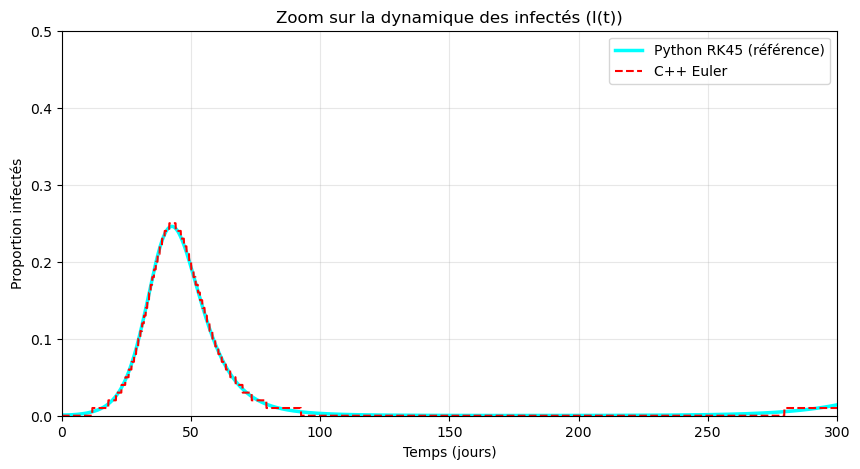

In [3]:
plt.figure(figsize=(10,5))
plt.plot(df_py_r['time'], df_py_r['I'], label='Python RK45 (référence)', color='cyan', linewidth=2.5)
plt.plot(df_cpp_e['time'], df_cpp_e['I'], label='C++ Euler', color='red', linestyle='--')
plt.title('Zoom sur la dynamique des infectés (I(t))')
plt.xlabel('Temps (jours)')
plt.ylabel('Proportion infectés')
plt.xlim(0, 300)   # zoom sur la phase épidémique
plt.ylim(0, 0.5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('../figures/part1_peak_infected_zoom.png', dpi=150)
plt.show()